In [112]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df=pd.read_pickle('features.pkl')

In [43]:
df.head(5)

,tracks_2010,tracks_2011,tracks_2012,tracks_2013,tracks_2014,tracks_2015,tracks_2016,tracks_2017,tracks_2018,id,top_tracks,top_track_features,appearances
2 Chainz,0,0,1,1,1,0,0,1,0,17lzZA2AlOHwCwFALHttmp,"[2nBI3iWLhupR7LyAJ5GGkE, 5RBW30fFFVav2n0IqFj0f...","[{'audio_features': [{'danceability': 0.695, '...",4
21 Savage,0,0,0,0,0,0,0,1,1,1URnnhqYAYcrqrcwql10ft,"[2t8yVaLvJ0RenpXUIAC52d, 4paAidoE8VAemwU4jgCc6...","[{'audio_features': [{'danceability': 0.837, '...",2
3OH!3,1,0,0,0,0,0,0,0,0,0FWzNDaEu9jdgcYTbcOa4F,"[17tDv8WA8IhqE8qzuQn707, 1LjHre9uHSLMuUrKsl6pp...","[{'audio_features': [{'danceability': 0.682, '...",1
5 Seconds Of Summer,0,0,0,0,1,1,1,0,1,5Rl15oVamLq7FbSb0NNBNy,"[0SA903LGHxe4ExdRY2SqVH, 19hh7DkfRBrpRGYfKlw7j...","[{'audio_features': [{'danceability': 0.262, '...",4
50 Cent,0,1,0,0,0,0,0,0,0,3q7HBObVc0L8jNeTe5Gofh,"[41bIQPBE1lFN0mmw6Lmssz, 2I9foKseoFQh07p6sD2vo...","[{'audio_features': [{'danceability': 0.547, '...",1


# Exploratory Data Analysis

## Initial Thoughts

Looking at our newly joined data we can see that there are 369 unique artists that appear over the last nine years. We have taken Spotify's measurements of each of their top ten tracks leaving us with information on 3,690 unique songs.

Let's check to make sure this is true.

In [44]:
#finding the number of artists and their corresponding features
df.shape 

(369, 13)

In [45]:
#adding up the number of unique songs
df['top_tracks'].apply(len).sum() 

3666

In [46]:
#this didn't match up with our expectations of 3690 songs...
#what's going on?
df['top_tracks'].apply(len).unique()

array([10,  1,  3,  9])

In [47]:
#it looks like some artists don't have that many songs on spotify
len(df[df['top_tracks'].apply(len)==10])

365

In [48]:
#let's drop them from our data
df=df[df['top_tracks'].apply(len)==10]

## Recurrence Of Artists

The first place we decided to look in the data is the number of appearances for artists over the last nine years in the Top 100 lists. 
* How many artists show up over multiple years?
* Which artist has the longest streak appearing in the Top 100 list?

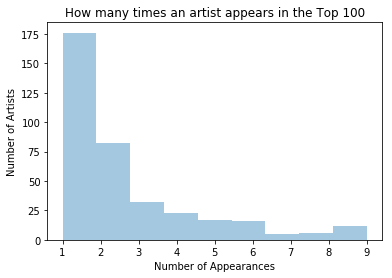

In [16]:
sns.distplot(df['appearances'], bins=9,kde=False)
plt.title('How many times an artist appears in the Top 100')
plt.xlabel('Number of Appearances')
plt.ylabel('Number of Artists');

In [129]:
#create a dummy DataFrame with all 0s replaced
#with NaNs in order to sum and find streaks
df_streak=df.replace(0,np.nan)

#trust us that this works...
#this creates a new feature for each artist 
#with their apperance streak
df['streak']=([df_streak.T[artist].groupby( 
    df_streak.T[artist].ne(df_streak.T[artist].shift()).cumsum()) 
   .cumcount().max()+1 for artist in df_streak.T.columns])


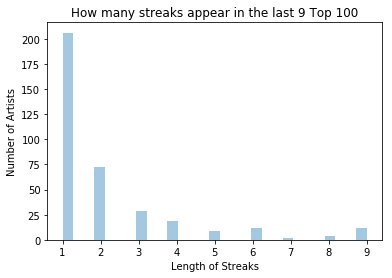

In [132]:
sns.distplot(df['streak'], kde=False)
plt.title('How many streaks appear in the last 9 Top 100')
plt.xlabel('Length of Streaks')
plt.ylabel('Number of Artists');

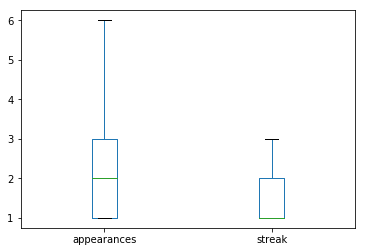

In [135]:
df[['appearances','streak']].plot(kind='box',showfliers=False);

## Insights in Recurrence
It appears that artists that appear on the top 100 list are likely to appear at least one more time and likely to be in consecutive years. A surprising number of artists swept (i.e appeared in all 9 years that we looked at). Let's take a closer look at these superstars.

In [146]:
print(f'There are {len(df[df["appearances"]==9])} superstars on the list.')
print(', '.join(df[df['appearances']==9].index))

There are 12 superstars on the list.
Beyonce, Blake Shelton, Chris Brown, Drake, Eminem, Jason Aldean, Lady Gaga, Luke Bryan, Maroon 5, Nicki Minaj, Rihanna, Taylor Swift


## What makes a superstar?
We have a list of 12 superstars and their top ten tracks. Let's dig into information about the most popular songs of these superstars to see if we can find some trends. We can then compare these to the artists who only topped the charts one time.

In [391]:
super_df=pd.DataFrame(df['top_track_features']['Beyonce'][0]['audio_features'])
onehit_df=pd.DataFrame(df['top_track_features']['2 Chainz'][0]['audio_features'])
for artist in df.index:
    new_df=pd.DataFrame(df['top_track_features'][artist][0]['audio_features'])
    if df.loc[artist]['appearances']>2:
        super_df=pd.concat([super_df, new_df])
    else:
        onehit_df=pd.concat([onehit_df, new_df])

In [340]:
super_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1120.000000,1120.000000,1120.00000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,0.195352,0.636714,227264.65000,0.663174,0.008710,4.958929,0.183023,-6.091591,0.650000,0.090605,121.617673,3.967857,0.497354
std,0.231092,0.141933,45310.64593,0.179110,0.056196,3.600729,0.149954,2.234911,0.477183,0.091177,28.443381,0.265440,0.220749
min,0.000018,0.209000,119787.00000,0.056200,0.000000,0.000000,0.021200,-18.425000,0.000000,0.023200,48.718000,1.000000,0.033600
25%,0.027425,0.544750,199209.75000,0.548000,0.000000,1.000000,0.095225,-7.260500,0.000000,0.035375,99.069000,4.000000,0.326000
50%,0.097100,0.643000,220757.00000,0.692000,0.000000,5.000000,0.122000,-5.712000,1.000000,0.048850,120.026000,4.000000,0.483000
75%,0.280500,0.739250,247186.75000,0.800000,0.000030,8.000000,0.211250,-4.550250,1.000000,0.105000,140.026250,4.000000,0.656250
max,0.965000,0.967000,576346.00000,0.989000,0.838000,11.000000,0.983000,-0.804000,1.000000,0.681000,205.958000,5.000000,0.978000


In [341]:
onehit_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,0.194198,0.634302,223815.497647,0.664952,0.016835,5.438431,0.179476,-6.275505,0.654902,0.099931,122.057031,3.964706,0.497788
std,0.237291,0.149762,47415.581947,0.183667,0.094254,3.627725,0.137882,2.561981,0.475493,0.099053,29.008914,0.299616,0.222832
min,0.000005,0.126000,48480.000000,0.072600,0.000000,0.000000,0.015700,-22.320000,0.000000,0.023500,54.028000,0.000000,0.035200
25%,0.021500,0.534000,194779.500000,0.544250,0.000000,2.000000,0.094825,-7.521250,0.000000,0.036300,98.047000,4.000000,0.326000
50%,0.096200,0.645500,217406.500000,0.694000,0.000000,6.000000,0.122000,-5.789500,1.000000,0.054800,122.090500,4.000000,0.495500
75%,0.269500,0.737000,245502.250000,0.805000,0.000035,9.000000,0.230000,-4.536750,1.000000,0.124000,140.361000,4.000000,0.670000
max,0.989000,0.973000,536067.000000,0.991000,0.944000,11.000000,0.955000,0.175000,1.000000,0.743000,211.261000,5.000000,0.976000


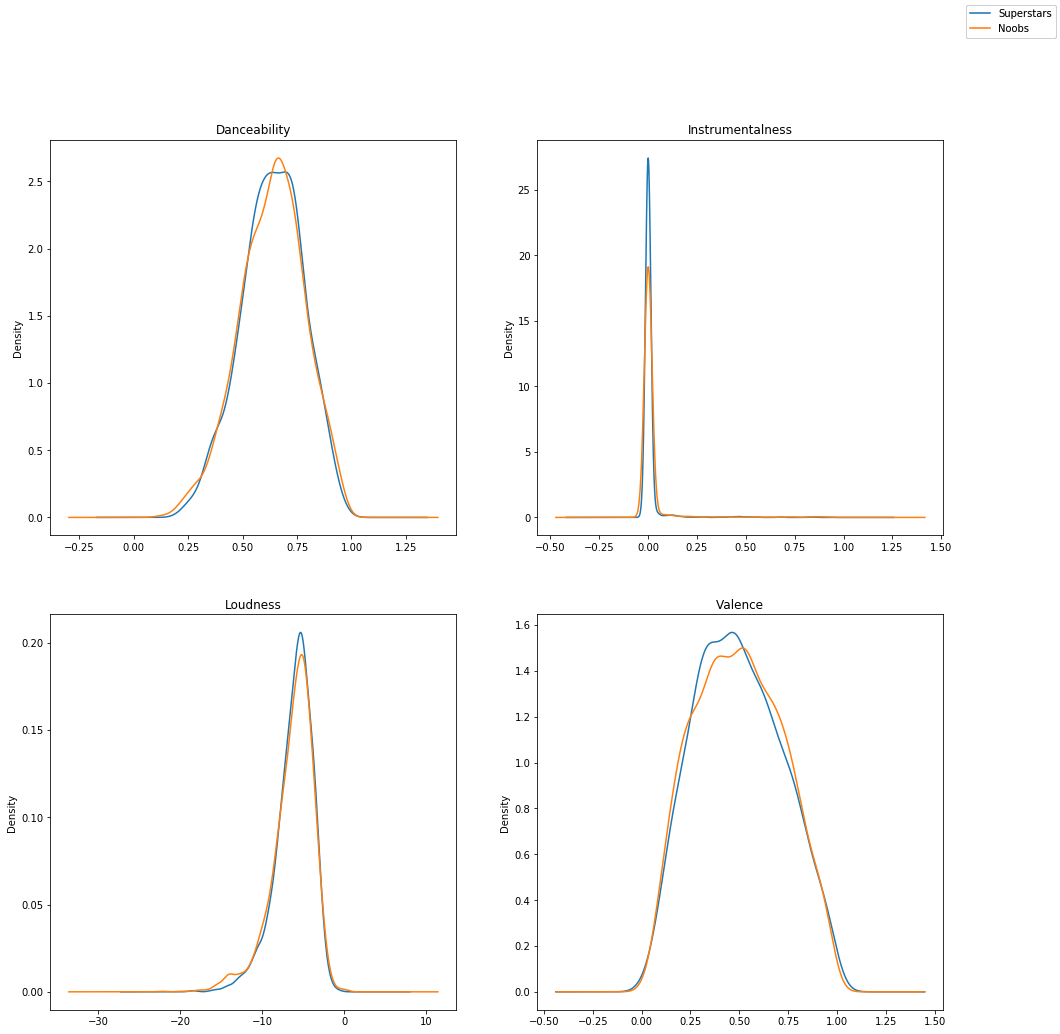

In [442]:
#plot figure comparing danceability for two subsets: repeat artists and one year wonders
fig=plt.figure(figsize=(16,16))
ax1=fig.add_subplot(221)
super_df['danceability'].plot(kind='kde')
onehit_df['danceability'].plot(kind='kde')
plt.title('Danceability')
fig.legend(['Superstars','Noobs'])
ax2=fig.add_subplot(222)
super_df['instrumentalness'].plot(kind='kde')
onehit_df['instrumentalness'].plot(kind='kde')
plt.title('Instrumentalness')
fig.legend(['Superstars','Noobs'])
ax1=fig.add_subplot(223)
super_df['loudness'].plot(kind='kde')
onehit_df['loudness'].plot(kind='kde')
plt.title('Loudness')
fig.legend(['Superstars','Noobs'])
ax1=fig.add_subplot(224)
super_df['valence'].plot(kind='kde')
onehit_df['valence'].plot(kind='kde')
plt.title('Valence')
fig.legend(['Superstars','Noobs']);

## Top Artists or Top Songs?
As can be seen from the above plots of track features of the subsets of artists, there is a negligble difference between the two groups. This might be indicative that there are commonalities between top tracks in Spotify or perhaps that these attributes are indicative of top artists on the Billboard Top 100. To clarify these questions further work would be needed to grab a data set representative of artists not on the Top 100 and tracks that are not top tracks for these artists.

## What features are correlated?
Each song has a list of features which we can now correlate to see which features tend to go together.

Text(0.5, 1.0, 'Heatmap of Correlations for Audio Features')

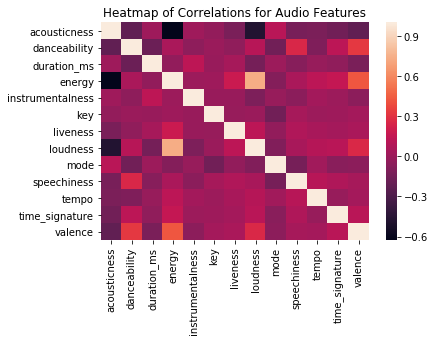

In [427]:
Var_Corr = track_df.corr()
# plot the heatmap
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns)
plt.title('Heatmap of Correlations for Audio Features')

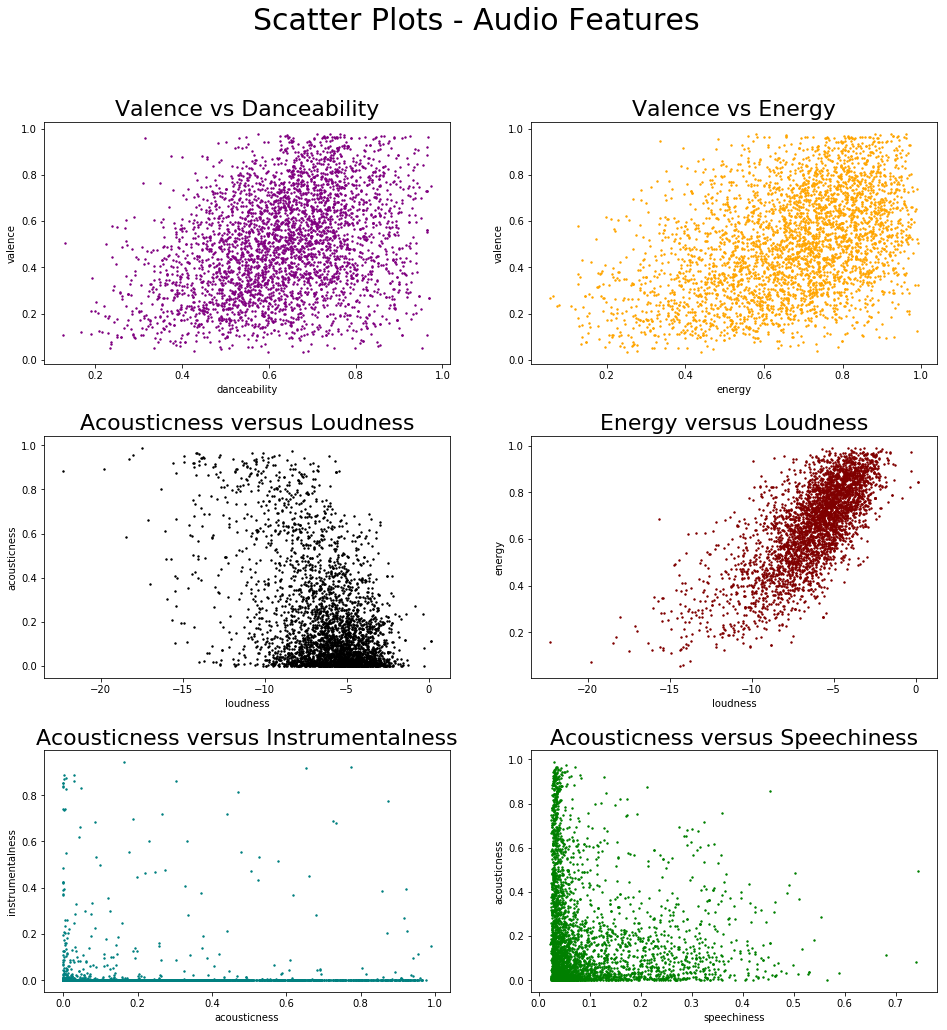

In [444]:
fig=plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=.3)
fig.suptitle('Scatter Plots - Audio Features',fontsize=30)
#scatter plots looking at higher correlated pairs of features
ax1=fig.add_subplot(321)
track_df.plot.scatter('danceability','valence',s=[2],c='purple', ax=ax1)
plt.title('Valence vs Danceability',fontsize=22)

ax2=fig.add_subplot(322)
track_df.plot.scatter('energy','valence',s=[2],c='orange',ax=ax2)
plt.title('Valence vs Energy',fontsize=22)

ax3=fig.add_subplot(323)
track_df.plot.scatter('loudness','acousticness',s=[2],c='black',ax=ax3)
plt.title('Acousticness versus Loudness',fontsize=22)

ax6=fig.add_subplot(324)
track_df.plot.scatter('loudness','energy',s=[2],c='maroon',ax=ax6)
plt.title('Energy versus Loudness',fontsize=22)

ax7=fig.add_subplot(325)
track_df.plot.scatter('acousticness','instrumentalness',s=[2],c='teal',ax=ax7)
plt.title('Acousticness versus Instrumentalness',fontsize=22)

ax8=fig.add_subplot(326)
track_df.plot.scatter('speechiness','acousticness',s=[2],c='green',ax=ax8)
plt.title('Acousticness versus Speechiness',fontsize=22);

Top songs for the most popular artists tend to be mood elevators with high energy and are great to dance to. Songs with high degree of acoutics/instrumentals do not tend to feature in top of the charts.